In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [14]:
# Artifical examples of Home Prices used to 
# generate the 3rd deg. polynomial function using polyfit
x1_idea = np.array([50, 100, 200, 400])
y_idea = np.array([250, 300, 600, 800])
np.polyfit(x1_idea, y_idea, 3)

array([-5.71428571e-05,  3.33333333e-02, -3.00000000e+00,  3.23809524e+02])

In [15]:
x1_mesh, x2_mesh = np.meshgrid(range(50,400,20), range(0,40,5))
y_mesh = 323.8 - 3*x1_mesh + 0.0333333*x1_mesh**2 - 0.0000571428*x1_mesh**3 - 10*x2_mesh
y_mesh = y_mesh + np.random.random(y_mesh.shape)*50

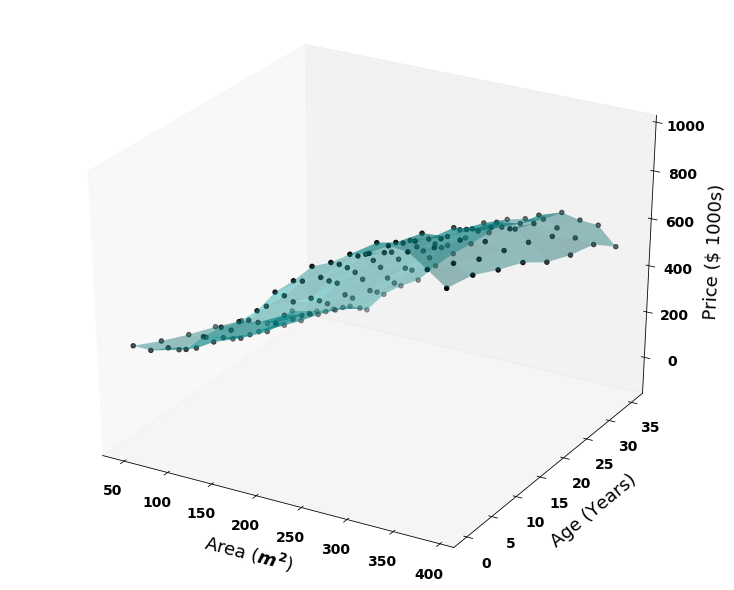

In [16]:
font = {'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

fig = plt.figure()
fig.set_size_inches(10,8)
ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha = 0.4, color = 'cyan')
ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('HomePriceExample.png', dpi = 350)

In [17]:
data = np.array([x1_mesh, x2_mesh, y_mesh]).reshape(3, -1).T
df = pd.DataFrame(data, columns = ['Area','Age','Price'])
X, y = df[['Area','Age']], df[['Price']]
df.head()

,Area,Age,Price
0,50.0,0.0,296.796883
1,70.0,0.0,295.642872
2,90.0,0.0,325.230838
3,110.0,0.0,336.718895
4,130.0,0.0,408.482487


In [18]:
from sklearn.linear_model import LinearRegression
LinRegModel = LinearRegression()
LinRegModel.fit(X, y)
y_pred = LinRegModel.predict(X)

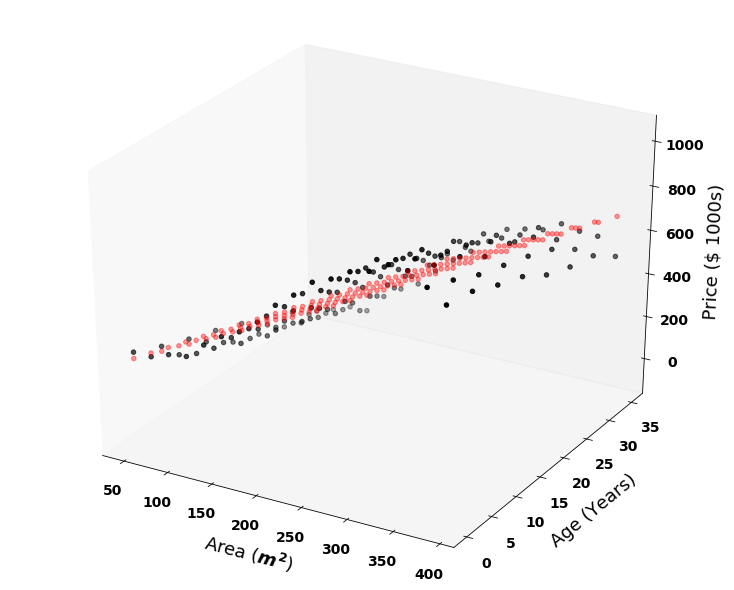

In [19]:
fig = plt.figure()
fig.set_size_inches(10,8)
ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
# ax.plot_surface(x1, x2, y, alpha = 0.4, color = 'cyan')
ax.scatter(df.Area, df.Age, y_pred, alpha = 0.4, color = 'red')
ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('HomePriceExample.png', dpi = 350)

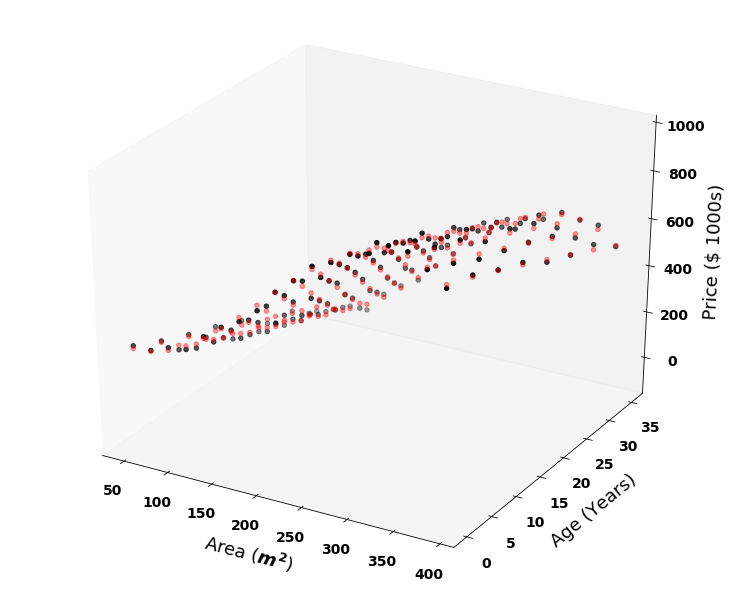

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_transform = PolynomialFeatures(degree=3)
X_poly = poly_reg_transform.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly,y)
y_pred_poly = poly_reg_model.predict(X_poly)

fig = plt.figure()
fig.set_size_inches(10,8)
ax = Axes3D(fig)
ax.scatter(x1_mesh, x2_mesh, y_mesh, color = 'black')
# ax.plot_surface(x1, x2, y, alpha = 0.4, color = 'cyan')
ax.scatter(df.Area, df.Age, y_pred_poly, alpha = 0.4, color = 'red')
ax.set_xlabel('Area ($m^2$)', fontsize = 18, labelpad = 20)
ax.set_ylabel('Age (Years)', fontsize = 18, labelpad = 20)
ax.set_zlabel('Price ($ 1000s)', fontsize = 18, labelpad = 20)
ax.tick_params(labelsize=14, direction='in', pad = 10)
ax.grid(False)
fig.savefig('HomePriceExample.png', dpi = 350)

In [21]:
poly_reg_model.coef_

array([[ 0.00000000e+00, -3.16882895e+00, -1.03278987e+01,
         3.39815467e-02,  4.13073560e-03, -1.97099210e-02,
        -5.80959918e-05,  6.43489522e-07, -1.21982742e-04,
         8.00806236e-04]])

In [22]:
poly_reg_model.intercept_

array([366.30568761])

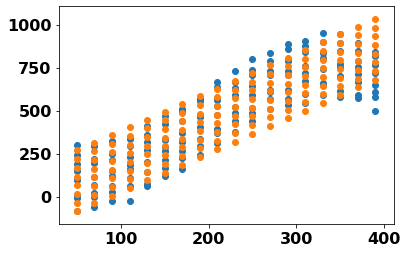

In [23]:
plt.scatter(X.Area,y.Price)
plt.scatter(X.Area,y_pred)

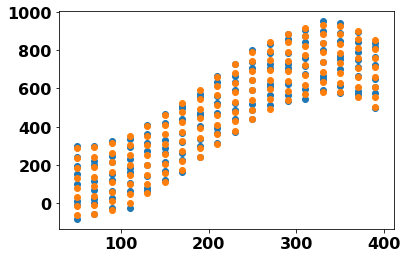

In [24]:
plt.scatter(X.Area,y.Price)
plt.scatter(X.Area,y_pred_poly)